In [1]:
%pip install gurobipy networkx 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import gurobipy as gp
import networkx as nx
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
from costgraph.Functions import *
from costgraph.Models import *
from costgraph.Graph import *

In [2]:
costly_edge = EdgeCostLinear(6,2,3,10)
cheap_edge = EdgeCostExponential(10,6,1,8,0.7)

In [10]:
def graphEdgeFunc(title: str, edge: EdgeCostFunction):
    
    title_fontsize = 25
    equation_fontsize = 24
    fontsize=20
    
    padding = 0.2
    
    # Turn on TEX support
    plt.rcParams['text.usetex'] = True
    fig, ax = plt.subplots(figsize=(16, 10))
    fig.set_facecolor((1,1,1))
    
    # Generate plot
    BB = np.linspace(0, 1.5 * (edge.b_min), 500)
    C = edge.f(BB)
    ax.plot(BB, C, label=edge.equation)
    
    # Set plot limits
    ylim_bottom = 0.8 * edge.c_min
    ylim_top = 1.5 * edge.c_init
    ylim_diff = ylim_top - ylim_bottom
    
    xlim_bottom = 0
    xlim_top = 1.3 * edge.b_min
    xlim_diff = xlim_top - xlim_bottom
    
    # Display equation
    #ax.text(0.5 * xlim_diff + xlim_bottom, 0.8 * ylim_diff + ylim_bottom, edge.equation, fontsize=equation_fontsize)
    
    # Display points
    ax.text(edge.b_init + padding, edge.c_init + padding, 
            r"$(c_{init}=%10.2f, b_{init}=%10.2f)$" % (edge.c_init, edge.b_init), fontsize=fontsize)
    ax.text(edge.b_min - 2 * padding, edge.c_min + 2 * padding, 
            r"$(c_{min}=%10.2f, b_{min}=%10.2f)$" % (edge.c_min, edge.b_min), fontsize=fontsize)
    
    # Print extra parameters for complex models
    if isinstance(edge, EdgeCostExponential):
        # This is a trick to display the alpha value in the legend.
        ax.plot([],[], ' ', label=r"$\alpha = %10.2f$" % edge.alpha)
        
    
    # Mark important points
    color=['dimgray', 'darkgray']
    x_pts = [edge.b_init, edge.b_min]
    y_pts = [edge.c_init, edge.c_min]
    plt.hlines(y=y_pts, xmin=[0,0], 
               xmax=x_pts, color=color, linestyles='dashed')
    plt.vlines(x=x_pts, ymin=[ylim_bottom, ylim_bottom], 
               ymax=y_pts, color=color, linestyle = 'dashed')
    
     # Set plot settings
    plt.legend(frameon=False, fontsize=equation_fontsize)
    plt.ylim(ylim_bottom, ylim_top)
    plt.xlim(xlim_bottom, xlim_top)
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xlabel("Edge budget", fontsize=fontsize)
    ax.set_ylabel("Cost of Edge Traversal", fontsize=fontsize)
    plt.show()

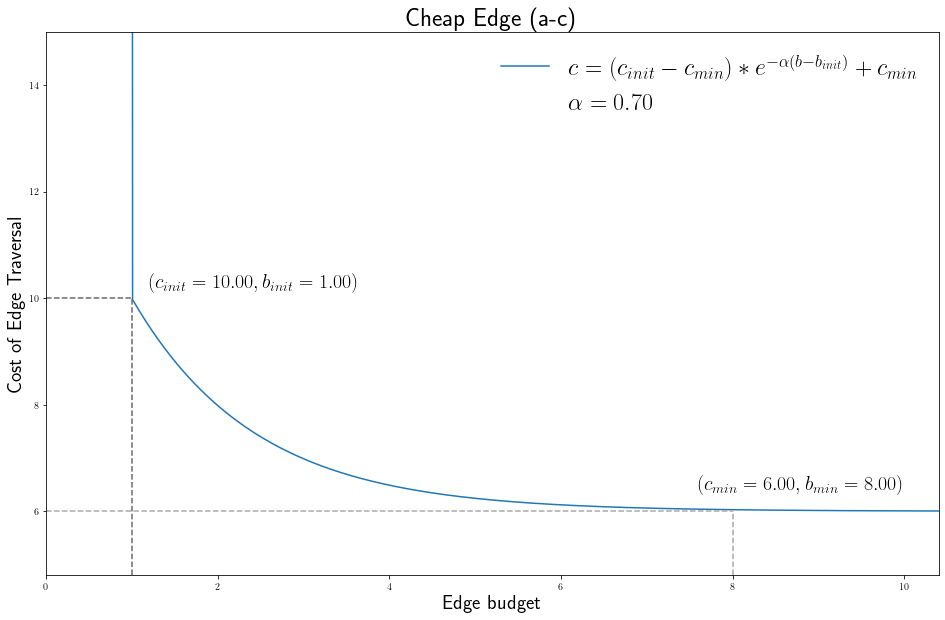

In [11]:
graphEdgeFunc("Cheap Edge (a-c)", cheap_edge)

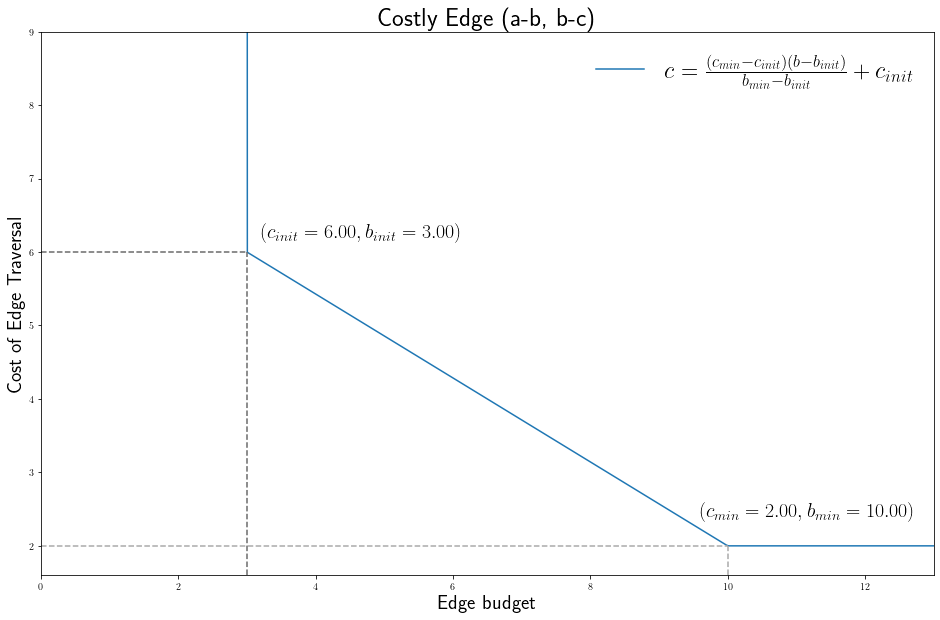

In [12]:
graphEdgeFunc("Costly Edge (a-b, b-c)", costly_edge)

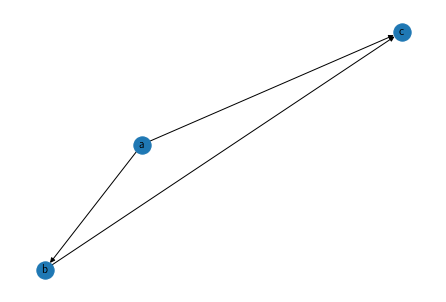

In [13]:
G = CostFuncGraph()
G.add_edge("a", "b", costly_edge)
G.add_edge("b", "c", costly_edge)
G.add_edge("a", "c", cheap_edge)

nx.draw(G, with_labels=True)

In [14]:
""" MODEL PARAMETERS """

start_node = 'a'
end_node = 'c'

# Budget for planning problem
#B = 22
#B = 16.3
B = 16.8
# Number of points in piecewise approximation of edge cost functions
n = 300

In [15]:
model = Model(G, start_node, end_node, B, n)
s_path = model.solve(print_path=True)

a -> b: b=8.41204 c=2.90741
b -> c: b=8.38796 c=2.92117
Total budget used: 16.8
Total cost for path: 5.82857


In [16]:
cheapest_long = G.edges[('a','b')]['f'].f(B/2) + G.edges[('b','c')]['f'].f(B/2)
print(f"Cheapest long path (a->b, b->c): {cheapest_long}")
cheapest_short = G.edges[('a','c')]['f'].f(B)
print(f"Cheapest short path (a->c): {cheapest_short}")

Cheapest long path (a->b, b->c): 5.828571428571429
Cheapest short path (a->c): 6.000062916277819
